<a href="https://colab.research.google.com/github/raoak18/Hotels-Data-Analysis-EDA/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

#  **Some basic steps which will have to start EDA.**

# **First Step-Firstly we will import all the imortant libraries which helps us in our Analysis process**

---



---



In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import date
from datetime import timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# **Second Step-Now we will mount our google drive and import the data into a variable from CSV file.**


---



---



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Now creating the DataFrame from the csv file.
hotel_data=pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone Project/Hotel Bookings-Aakash Yadav/Hotel Bookings.csv')

#**Third Step- Now we will check whether our data is loaded successfull or not and then we will do some basic analysis of our data**

In [5]:
#Lets check whether DataFrame created successfully or not.
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
hotel_data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [7]:
hotel_data.shape

(119390, 32)

In [8]:
#Lets analyse the basic information of our DataFrame:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
#Now analyse some basic description of our DataFrame.
hotel_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [10]:
hotel_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

# **Results:**
* From the above operations we can clearly sees that the our data contains 119390 rows and 32 variables(columns) out of which maximum columns don't have null values in it.
* Two columns(Company and Agent) contains large number of null values.

# **Fourth Step-Cleaning the data and Handling the null values.**

* Let we check the which columns has the most number of null values.

In [11]:
null_values=hotel_data.isna().sum().sort_values(ascending=False).head(8).reset_index().rename({0:"number of null values"},axis=1)
null_values

,index,number of null values
0,company,112593
1,agent,16340
2,country,488
3,children,4
4,reserved_room_type,0
5,assigned_room_type,0
6,booking_changes,0
7,deposit_type,0


* As we can cleary see that only four columns(*company*, *agent*, *country*  and *children*) contains the null values. But the "company" and "agent" columns contains very large number of null values i.e. 112593 and 16340 respectevily. So we can drop these columns.





In [12]:
hotel_data.drop(['company', 'agent'], axis=1,inplace=True)

In [13]:
hotel_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

* We did not removed the country column because it contains 488 null values out of 119390, which is negligible. So for dealing with these null values we will replace those null values with XYZ.

In [14]:
hotel_data["country"]=hotel_data['country'].fillna('XYZ')

In [15]:
#Now our updated DataFrame is of size:
hotel_data.shape

(119390, 30)

# Four children column 4 rows have null values,which is very less. So we can replace these null values with 0.

In [16]:
hotel_data['children']=hotel_data['children'].fillna(0)

In [17]:
hotel_data['children'].unique()

array([ 0.,  1.,  2., 10.,  3.])

* changing this column data type into integer


In [18]:
hotel_data['children']=hotel_data['children'].astype(int)

In [19]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int64  
 11  babies                          119390 non-null  int64  
 12  meal            

#**Now our data is free from all the null values.**

In [20]:
hotel_data.isnull().sum().head(5)

hotel                 0
is_canceled           0
lead_time             0
arrival_date_year     0
arrival_date_month    0
dtype: int64

#Now we are removing those rows in which total number of guests is equal to 0 i.e. adult+children+babies==0

In [21]:
hotel_data[(hotel_data.children+hotel_data.adults+hotel_data.babies)==0].shape

(180, 30)

* 180 rows have total number of guests=0

#Droping those 180 rows.

In [22]:
hotel_data=hotel_data.drop(hotel_data[(hotel_data.children+hotel_data.adults+hotel_data.babies)==0].index)

# For reducing number of columns we can drop the columns namely adult,children, babies and create a single column in place of these namely Total number of guest.

In [23]:
hotel_data['Total_number_of_guest']=hotel_data['adults']+hotel_data['children']+hotel_data['babies']
hotel_data.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_number_of_guest
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2


In [24]:
hotel_data.drop(['adults','children','babies'], axis=1, inplace=True)

# **Now our data is cleaned. Now we will do the EDA on it.**

In [25]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_week_nights            119210 non-null  int64  
 9   meal                            119210 non-null  object 
 10  country                         119210 non-null  object 
 11  market_segment                  119210 non-null  object 
 12  distribution_cha

#**Q1. Which type of hotel genrally people prefer to book?**

In [26]:
#let copy the above cleaned hotel data into a new variable data.
data=hotel_data.copy()

In [27]:
hotel_type=data['hotel'].value_counts().reset_index().rename(columns={'index':'Hotel Type', 'hotel':"Number of bookings"})
hotel_type

,Hotel Type,Number of bookings
0,City Hotel,79163
1,Resort Hotel,40047


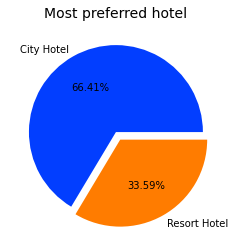

In [28]:
palette_color = sns.color_palette('bright')
plt.pie(x=hotel_type['Number of bookings'], labels=hotel_type['Hotel Type'], colors=palette_color, explode=[0,.1],autopct='%1.2f%%')
plt.title('Most preferred hotel', fontsize=14)
plt.show()


* ***Observation:***
People prefer to book City Hotels more as compare to Resort Hotels. 

#**Q2. What is the percentage of cancellation of Bookings?**

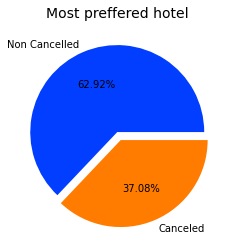

In [29]:
plt.pie(data['is_canceled'].value_counts(), labels=['Non Cancelled', 'Canceled'], colors=palette_color, explode=[0,.1],autopct='%1.2f%%')
plt.title("Most preffered hotel", fontsize=14)
plt.show()


***Observation:***
37.08% bookings got canceled by the guests. 

#**Q3. Which type of customers do more bookings?**

In [30]:
non_canceled=data[data['is_canceled']==0]
non_canceled.shape

(75011, 28)

In [31]:
non_canceled['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [32]:
customer_type=non_canceled['customer_type'].value_counts()
customer_type

Transient          52982
Transient-Party    18703
Contract            2810
Group                516
Name: customer_type, dtype: int64

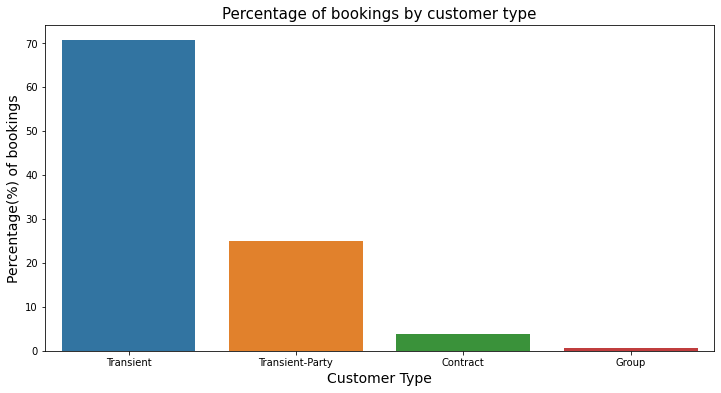

In [33]:
plt.figure(figsize=(12,6))
sns.barplot(x=customer_type.index, y=(customer_type.values*100)/non_canceled['customer_type'].count())
plt.xlabel("Customer Type", fontsize=14)
plt.ylabel('Percentage(%) of bookings', fontsize=14)
plt.title("Percentage of bookings by customer type", fontsize=15)
plt.show()

***Observation:*** 
* Booking by the Transient Customer is as compare to other type of customers(approx. 70% of all the bookings).

#**Q4. What is the percentage of repeated guest?**

In [34]:
repeated_guest=non_canceled['is_repeated_guest'].value_counts()
repeated_guest

0    71806
1     3205
Name: is_repeated_guest, dtype: int64

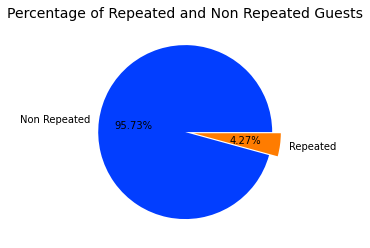

In [35]:
plt.pie(repeated_guest, labels=['Non Repeated', 'Repeated'],explode=[0,0.1],colors=palette_color,  autopct='%1.2f%%')
plt.title("Percentage of Repeated and Non Repeated Guests", fontsize=14)
plt.show()

***Observations:***
* Repeated guest are very few which only 4.27%.
* In order to retained the guests management should take feedbacks from guests and try to imporve the services.

#**Q5. What is the percentage of number of changes in bookings by the customers/guest?**

In [36]:
booking_changes=non_canceled['booking_changes'].value_counts()

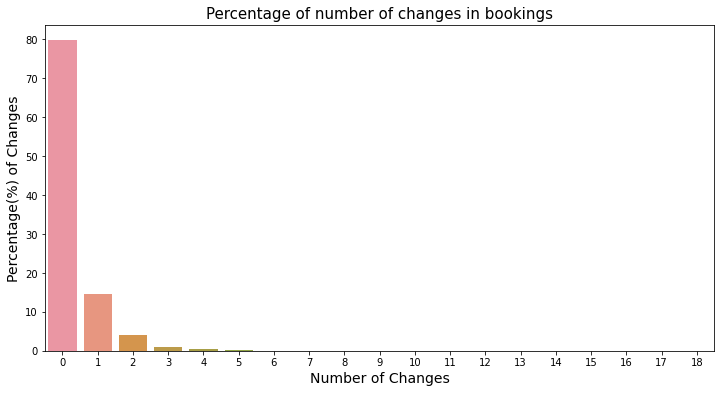

In [37]:
plt.figure(figsize=(12,6))
sns.barplot(x=booking_changes.index, y=(booking_changes.values*100)/non_canceled['booking_changes'].count())
plt.xlabel("Number of Changes", fontsize=14)
plt.ylabel('Percentage(%) of Changes', fontsize=14)
plt.title("Percentage of number of changes in bookings", fontsize=15)
plt.show()

***Observation***
* Almost 85% of the bookings were not changed by guests.
* Some time guestes made 1 or 2 changes  in their bookings. Otherwise, its very rare.

#***Q5. Which type of deposit is more preferred by the customers?***

In [38]:
deposit_type=data['deposit_type'].value_counts()
deposit_type

No Deposit    104461
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

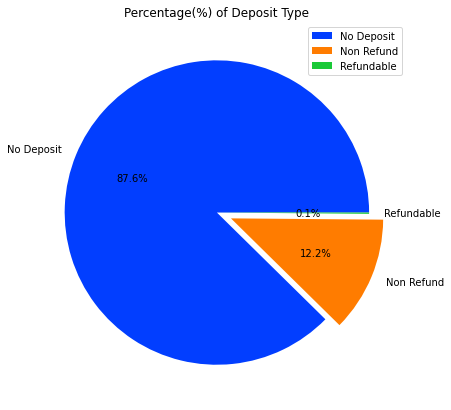

In [39]:
plt.figure(figsize=(14,7))
plt.pie(x=deposit_type.values, labels=deposit_type.index,colors=palette_color,  explode=[0,0.1,0], autopct='%1.1f%%')
plt.legend( labels=deposit_type.index, loc='best')
plt.title('Percentage(%) of Deposit Type')
plt.show()

***Observation:***
* 87.6% of guests prefer "No deposit" type of deposit.

#**Q6. Which kind of food is mostly preffered by the guests?**

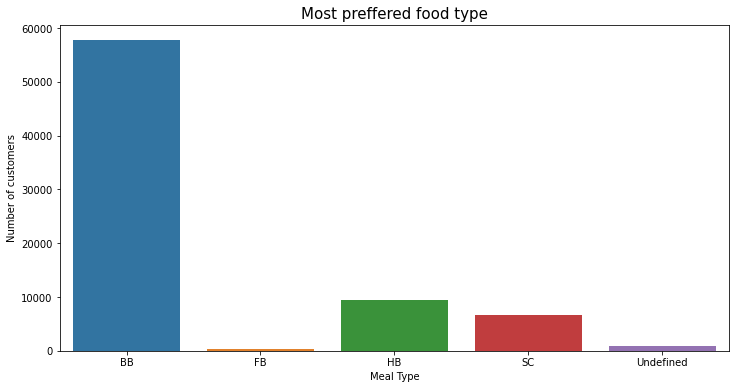

In [40]:
plt.figure(figsize=(12,6))
sns.countplot(x=non_canceled['meal'])
plt.xlabel('Meal Type')
plt.ylabel('Number of customers')
plt.title('Most preffered food type', fontsize=15)
plt.show()

***Observation:***

* So the moost preferred food by the customers is BB(Bed and Breakfast).
* HB(Half Board) and SC(Self catering) are apprx. equally preferred.

#**Q7.From which country mostly guests are coming from?**


In [41]:
guest_country=non_canceled['country'].value_counts().reset_index().rename(columns={'index':'Country', 'country':'Number of Guests'})
guest_country

,Country,Number of Guests
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,BHR,1
162,DJI,1
163,MLI,1
164,NPL,1


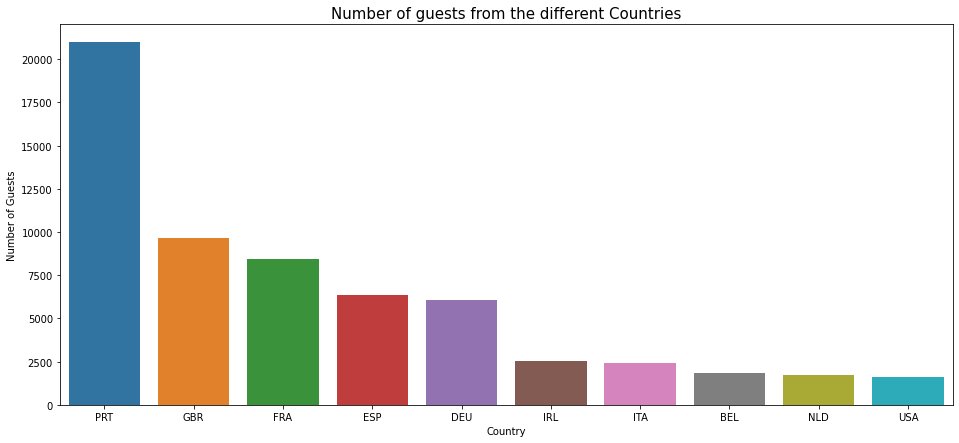

In [42]:
#ploting bar graph for the top 10 contries
plt.figure(figsize=(16,7))
sns.barplot(x=guest_country['Country'].head(10), y=guest_country['Number of Guests'].head(10))
plt.title("Number of guests from the different Countries", fontsize=15)
plt.show()


***Observation:***
* Most of the guests are coming from portugal i.e more 25000 guests are from portugal.

#**Q8. What is the most preferred room type?**


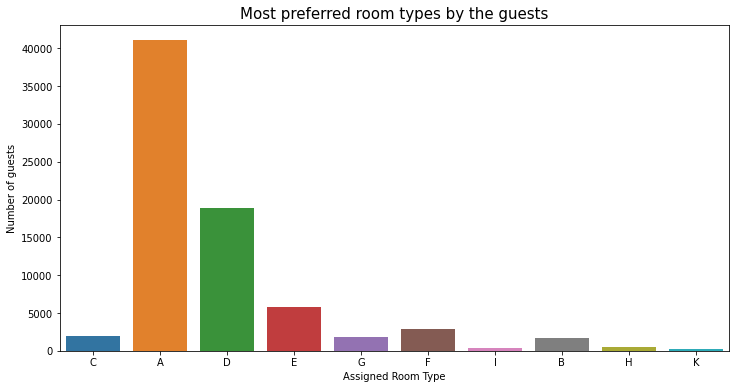

In [43]:
plt.figure(figsize=(12,6))
sns.countplot(x=non_canceled['assigned_room_type'])
plt.xlabel("Assigned Room Type")
plt.ylabel("Number of guests")
plt.title("Most preferred room types by the guests", fontsize=15)
plt.show()

**Observation:**
* The most preferred room is A.

#Q9.**Now we fill find how much guests pay for a room per night?**



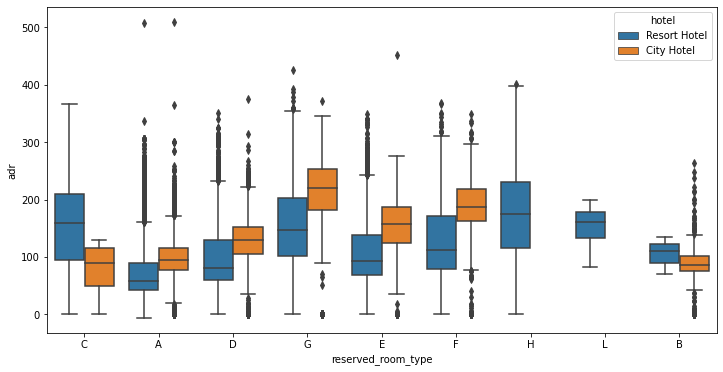

In [44]:
plt.figure(figsize=(12,6))
sns.boxplot(x='reserved_room_type', y='adr', data=non_canceled, hue='hotel')
plt.show()

**Observations**
* The figure shows that the average price per room depends on its type.
* For Resorts G,H and C type of Rooms are most costly.
* For City Hotels, G type rooms are most costly. They are more expensise then the resort hotels.




#**Q10. Which months of the year are most busiest for bookings?**

In [45]:
monthly_bookings=non_canceled.groupby('arrival_date_month')['hotel'].value_counts().unstack().reset_index()
monthly_bookings

hotel,arrival_date_month,City Hotel,Resort Hotel
0,April,4010,2550
1,August,5367,3257
2,December,2377,2014
3,February,3051,2308
4,January,2249,1866
5,July,4770,3137
6,June,4358,2037
7,March,4049,2571
8,May,4568,2535
9,November,2676,1975


**Now we observe here that month column is not in order, and if we visualize we will get improper conclusions. So we set them in proper order first.**


In [46]:
!pip install sort-dataframeby-monthorweek

!pip install sorted-months-weekdays
import sort_dataframeby_monthorweek as sd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3442 sha256=ea92df4de65a745aed9d9e106639bf348ed455684d945c710e528ee2793a9c29
  Stored in directory: /root/.cache/pip/wheels/de/e1/ad/5fe265a9780676079c4b8caaaffaa8d5c4ab2f37cf823e8aa8
Successfully built sort-dataframeby-monthorweek
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3247 sha256=258d17d6506e2af1ab542cb7eff4a5f5b7809c60e6092eb4640134a8476e9a05
  Stored in directory: /root/.cache/pip/wheels/4f/4f/78/3f1b8fc72651f7c766a6f73d667fccb12a8aabe240b38df7a4
Successfully built sorted-months-weekdays


In [47]:
monthly_bookings=sd.Sort_Dataframeby_Month(monthly_bookings,'arrival_date_month')
monthly_bookings

,arrival_date_month,City Hotel,Resort Hotel
0,January,2249,1866
1,February,3051,2308
2,March,4049,2571
3,April,4010,2550
4,May,4568,2535
5,June,4358,2037
6,July,4770,3137
7,August,5367,3257
8,September,4283,2102
9,October,4326,2575


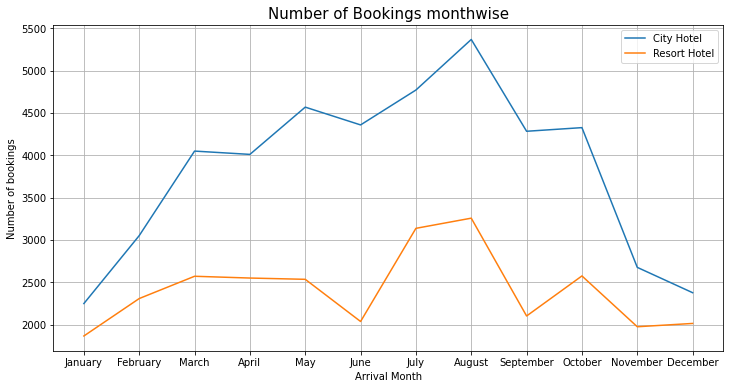

In [48]:
plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_bookings['arrival_date_month'], y=monthly_bookings['City Hotel'])
sns.lineplot(x=monthly_bookings['arrival_date_month'], y=monthly_bookings['Resort Hotel'])
plt.xlabel('Arrival Month')
plt.ylabel('Number of bookings')
plt.title("Number of Bookings monthwise", fontsize=15)
plt.grid()
plt.legend(labels=['City Hotel', "Resort Hotel"])
plt.show()

***Observation:***
* July and August months had the most Bookings. Summer vaccation can be the reason for bookings.

#**Q10. How does the price vary overy the year?**

In [49]:
mean_price=non_canceled.groupby(['arrival_date_month','hotel'])['adr'].mean().unstack().reset_index()
mean_price

hotel,arrival_date_month,City Hotel,Resort Hotel
0,April,111.962267,75.867816
1,August,118.674598,181.205892
2,December,88.401855,68.410104
3,February,86.520062,54.147478
4,January,82.330983,48.761125
5,July,115.818019,150.122528
6,June,117.874360,107.974850
7,March,90.658533,57.056838
8,May,120.669827,76.657558
9,November,86.946592,48.706289


In [50]:
import sort_dataframeby_monthorweek as sd
mean_price=sd.Sort_Dataframeby_Month(mean_price, "arrival_date_month")
mean_price

,arrival_date_month,City Hotel,Resort Hotel
0,January,82.330983,48.761125
1,February,86.520062,54.147478
2,March,90.658533,57.056838
3,April,111.962267,75.867816
4,May,120.669827,76.657558
5,June,117.874360,107.974850
6,July,115.818019,150.122528
7,August,118.674598,181.205892
8,September,112.776582,96.416860
9,October,102.004672,61.775449


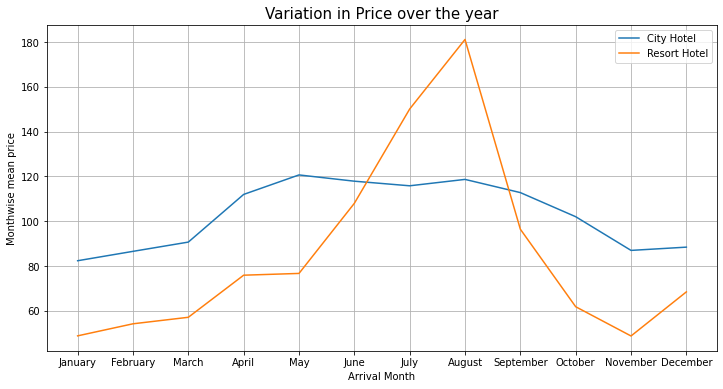

In [51]:
plt.figure(figsize=(12,6))
sns.lineplot(x=mean_price['arrival_date_month'], y=mean_price['City Hotel'])
sns.lineplot(x=mean_price['arrival_date_month'], y=mean_price['Resort Hotel'])
plt.xlabel('Arrival Month')
plt.ylabel('Monthwise mean price')
plt.grid()
plt.legend(labels=['City Hotel', "Resort Hotel"])
plt.title("Variation in Price over the year",fontsize=15)
plt.show()

#**Observations:**

* For Resort hotel adr is high in the month June,July,August as compared to City Hotels. May be Customers/People wants to spend their Summer vaccation in Resorts Hotels.

* From 9 observation, it is cleared that the, both type of hotels have the fewest guests during the winter. Therefore, the best time for guests to visit Resort or City hotels is January, February, March, April,October, November and December as the average daily rate in this month is very low.

#Q11.**How long people stays in hotel?**

In [52]:
non_canceled.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date',
       'Total_number_of_guest'],
      dtype='object')

In [104]:
data['Total nights']=data['stays_in_weekend_nights']+data['stays_in_week_nights']
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_number_of_guest,same_room_alotted,Total nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,BB,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2,1,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,BB,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2,1,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,BB,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,0,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,BB,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,BB,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,1,2


In [105]:
total_nights=data['Total nights'].value_counts().sort_index()
total_nights.head()

0      645
1    21005
2    27632
3    27064
4    17373
Name: Total nights, dtype: int64

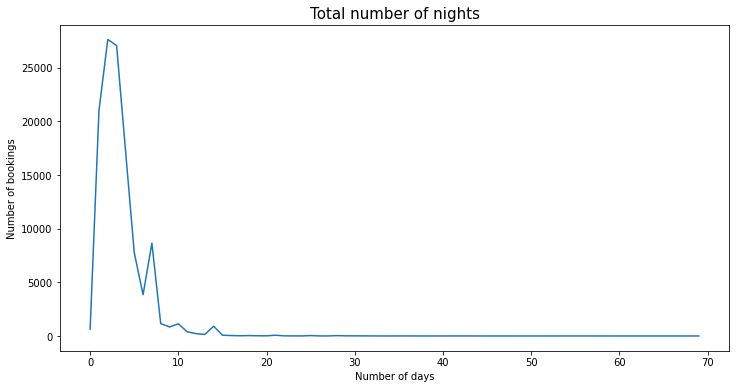

In [106]:
plt.figure(figsize=(12,6))
plt.plot(total_nights)
plt.xlabel("Number of days")
plt.ylabel('Number of bookings')
plt.title('Total number of nights', fontsize=15)
plt.show()

***Observation:***
* Guestes booked hotels mostly for 0 to 3 nights. 
* Very few guests booked hotels for more than 8 days.

# **Q.12 What is the most commenly used distribution channel for hotel bookings?**

In [56]:
booking_channel=data['distribution_channel'].value_counts().reset_index().rename(columns={'index':'Distribution Channel','distribution_channel':'Number of bookings'})
booking_channel

,Distribution Channel,Number of bookings
0,TA/TO,97750
1,Direct,14611
2,Corporate,6651
3,GDS,193
4,Undefined,5


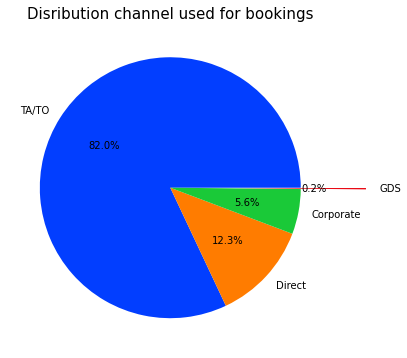

In [57]:
plt.figure(figsize=(12,6))
plt.pie(x=booking_channel['Number of bookings'].head(4), labels=booking_channel['Distribution Channel'].head(4),colors=palette_color, explode=[0,0,0,.5], autopct='%1.1f%%')
plt.title('Disribution channel used for bookings', fontsize=15)
plt.show()

***Observation:***
* TA/TO is mostly (82%) used for booking hotels



#**Q13. Which hotels generating more ADR?**

In [58]:
adr=non_canceled.groupby('hotel')['adr'].mean().reset_index()
adr

,hotel,adr
0,City Hotel,106.036141
1,Resort Hotel,90.822527


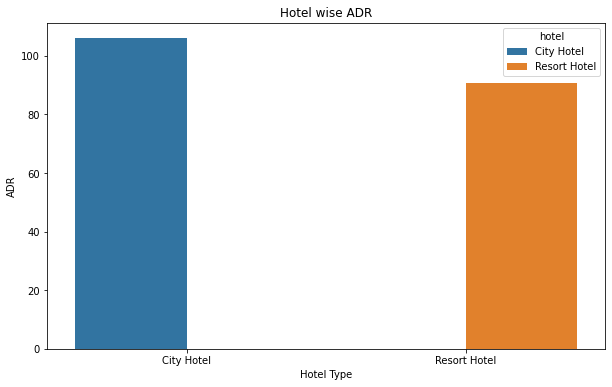

In [59]:
plt.figure(figsize=(10,6))
sns.barplot(x=adr['hotel'],y=adr['adr'], hue=adr['hotel'])
plt.title('Hotel wise ADR')
plt.xlabel('Hotel Type')
plt.ylabel('ADR')
plt.show()

***Observation:***
* City hotel has the highest ADR. That means city hotels are generating more revenues than the resort hotels. More the ADR more is the revenue.

# **Q14. Which type of hotel has longer waiting time?**

In [60]:
waiting_time=data.groupby("hotel")['days_in_waiting_list'].mean().reset_index()
waiting_time

,hotel,days_in_waiting_list
0,City Hotel,3.231484
1,Resort Hotel,0.521837


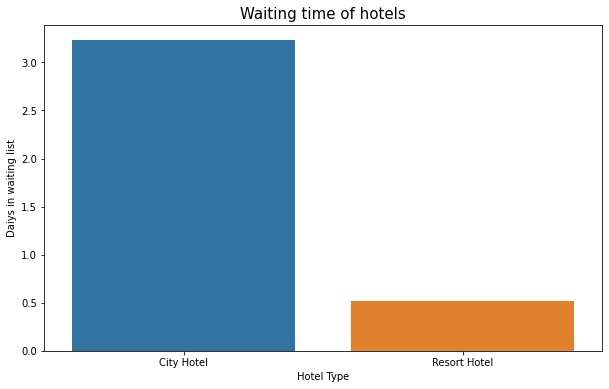

In [61]:
plt.figure(figsize=(10,6))
sns.barplot(x=waiting_time['hotel'],y=waiting_time['days_in_waiting_list'])
plt.xlabel('Hotel Type')
plt.ylabel('Daiys in waiting list')
plt.title("Waiting time of hotels", fontsize=15)
plt.show()

# **Q15. Which distribution channel contributed  more to generate high ADR?**

In [62]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date',
       'Total_number_of_guest'],
      dtype='object')

In [63]:
adr_by_channel=non_canceled.groupby(["hotel",'distribution_channel'])['adr'].mean().reset_index()
adr_by_channel

,hotel,distribution_channel,adr
0,City Hotel,Corporate,83.246747
1,City Hotel,Direct,110.918855
2,City Hotel,GDS,119.933462
3,City Hotel,TA/TO,106.837587
4,Resort Hotel,Corporate,51.556065
5,Resort Hotel,Direct,102.378177
6,Resort Hotel,TA/TO,92.116112
7,Resort Hotel,Undefined,112.700000


* Corporate- These are corporate hotel booing companies which makes bookings possible.
* GDS-A GDS is a worldwide conduit between travel bookers and suppliers, such as hotels and other accommodation providers. It communicates live product, price and availability data to travel agents and online booking engines, and allows for automated transactions.
* Direct- means that bookings are directly made with the respective hotels
* TA/TO- means that booings are made through travel agents or travel operators.
* Undefined- Bookings are undefined. May be customers made their bookings on arrival.

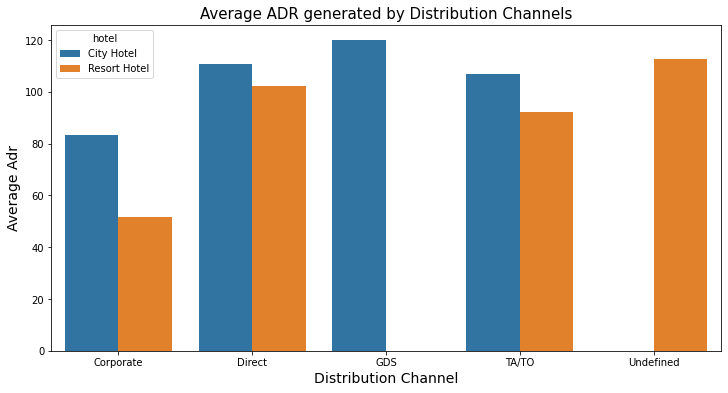

In [64]:
plt.figure(figsize=(12,6))
sns.barplot(x='distribution_channel', y='adr', data=adr_by_channel, hue='hotel')
plt.title("Average ADR generated by Distribution Channels", fontsize=15)
plt.xlabel("Distribution Channel", fontsize=14)
plt.ylabel("Average Adr", fontsize=14)
plt.show()

***Observation:***
* 'Direct' and 'TA/TO' has almost equally contributed in ADR in both types of hotels.
* GDS has highly contributed in adr in 'City Hotel' type.
* GDS need to increase Resort Hotel Bookings, for increasing its ADR.
* Resorts made high ADR by Undefiened mode of booking also.



#**Q16.Whether or not a hotel was likely to receive a disproportionately high number of special requests?**

In [65]:
special_request=data.groupby("hotel")['total_of_special_requests'].value_counts().unstack().T
special_request

hotel,City Hotel,Resort Hotel
total_of_special_requests,,
0,47853,22348
1,21377,11806
2,8125,4827
3,1584,910
4,198,142
5,26,14


Text(0.5, 1.0, 'Special requests made with bookings')

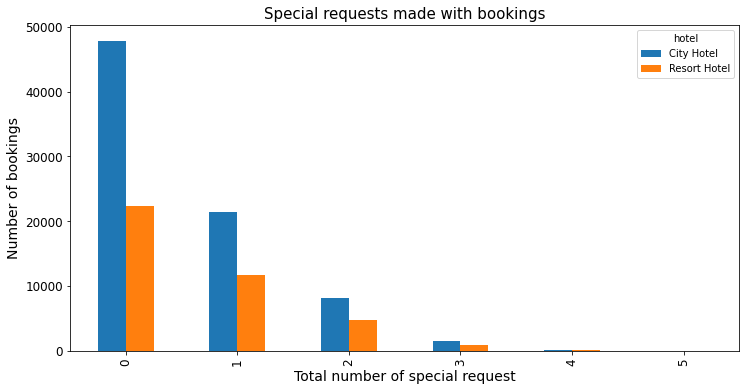

In [66]:
special_request.plot.bar(figsize=(12,6), fontsize=12)
plt.xlabel("Total number of special request", fontsize=14)
plt.ylabel('Number of bookings',fontsize=14)
plt.title('Special requests made with bookings', fontsize=15)

***Observation:***
* Maximum customer do not made any special requests alongwith their bookings.
* Number of special request is higher in case of city hotel, because the number of bookings is also higher.
* In the end, we can say that, very few customers made more than 2 special requests. 

#**Q17. Is customer canceled their bookings if they are not alloted with the same room type which was reserved by them?**


In [69]:
def same_room_alotted(x):
  '''function to check whether the reserved room
    type is same or not as assigned room type'''
  if x['reserved_room_type'] != x['assigned_room_type']:
       return 0
  else:
       return 1

In [70]:
data['same_room_alotted']=data.apply(lambda x: same_room_alotted(x), axis=1)
data_=data.groupby(['is_canceled'])['same_room_alotted'].value_counts().unstack().iloc[0,:].T.reset_index().rename(columns={0:"Number of bookings"})
data_

,same_room_alotted,Number of bookings
0,0,13995
1,1,61016


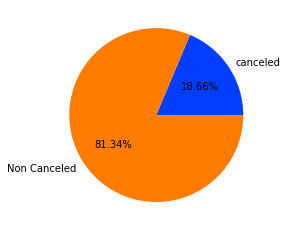

In [147]:
plt.pie(x=data_['Number of bookings'], labels=['canceled', 'Non Canceled'],colors=palette_color, autopct='%1.2f%%')
plt.show()

***Observations:***
* It is noticed that the majority(81.34%) customer do not canceled their booking, when they don't get the desired room.
* 18.66% bookings canceled due to this, so hotels need to take little care about this.

#***Correlation between  columns***

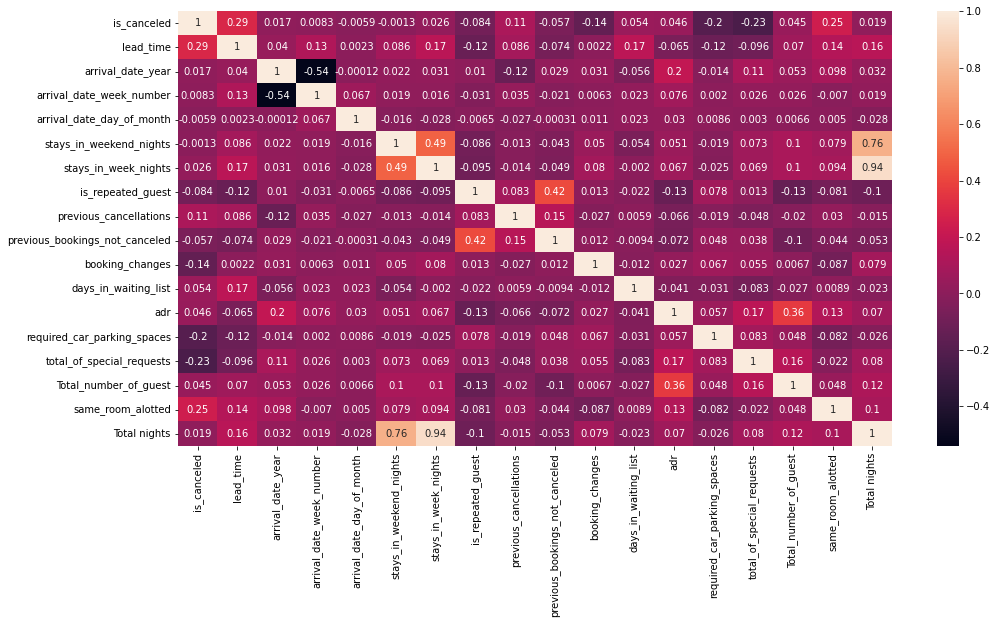

In [107]:
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(), annot=True)

***Observation:***

* is_canceled and same_room_alloted_or_not are posittively corelated. That means customer is sometimes cancel his bookings if he don't get the same room as per reserved room.
* lead_time and total_stay is positively corelated.That means more is the stay of cutsomer more will be the lead time.
* total number of guest is positevely corelated to each other. That means more the people more will be adr.
* is_repeated guest and previous bookings not canceled has strong corelation. May be repeated guests are not more likely to cancel their bookings.



#**Q18. What is the relationship between total number of Guests and ADR?**

In [86]:
guest_vs_adr=non_canceled.groupby('Total_number_of_guest')['adr'].mean().head()
guest_vs_adr

Total_number_of_guest
1     76.528818
2     97.952208
3    140.476984
4    183.148029
5    218.864660
Name: adr, dtype: float64

Text(0, 0.5, 'Average ADR')

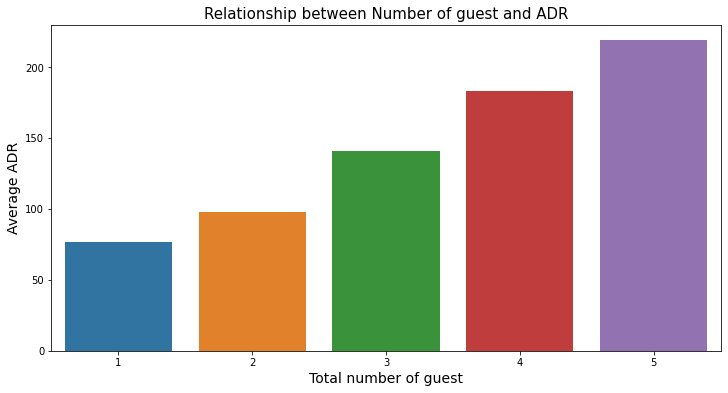

In [97]:
plt.figure(figsize=(12,6))
sns.barplot(x=guest_vs_adr.index, y=guest_vs_adr.values)
plt.title("Relationship between Number of guest and ADR", fontsize=15)
plt.xlabel("Total number of guest", fontsize=14)
plt.ylabel("Average ADR", fontsize=14)
plt.show()

***Observation:***
* As the total number of people increase adr also increases. Thus adr and Total people are directly proportional to each other.

#**Q19. What is the relationship between total stay and ADR?**

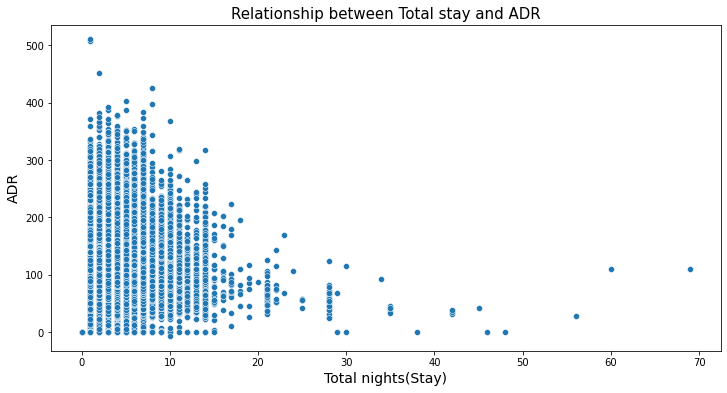

In [99]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=non_canceled['Total nights'], y=non_canceled['adr'])
plt.title("Relationship between Total stay and ADR", fontsize=15)
plt.xlabel("Total nights(Stay)", fontsize=14)
plt.ylabel("ADR", fontsize=14)
plt.show()


***Observation:***
* As the total stay increases adr is decreasing. Thus, for longer stays customer can get good adr(Price).